In [ ]:
import pandas as pd
import requests, zipfile, io
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
# Reading data set
diamonds = pd.read_csv('diamonds.csv', index_col=0)

In [ ]:
                                 ##### Exploratory Data Analysis #####
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
diamonds.shape

(53940, 10)

In [ ]:
diamonds.describe

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


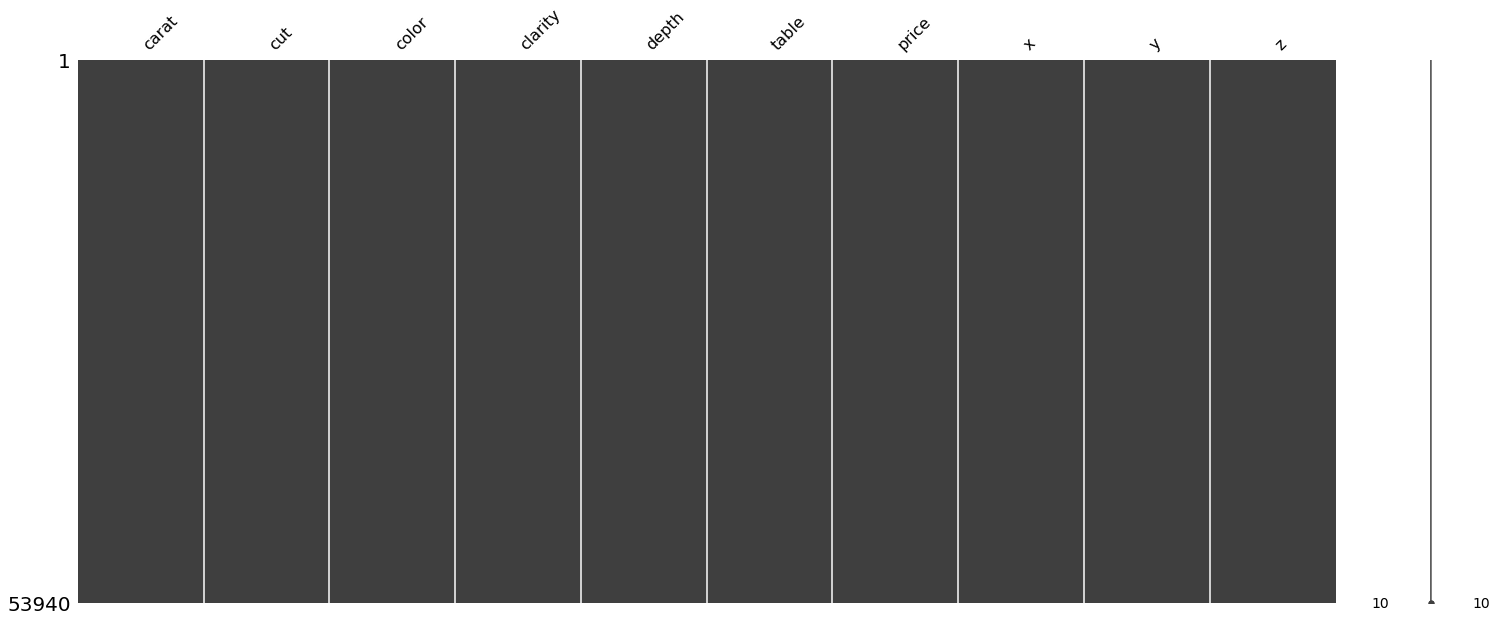

In [ ]:
# Checking missing values in the data set using visualization 
msno.matrix(diamonds)

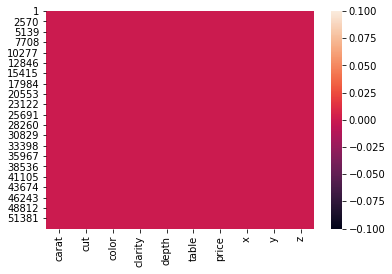

In [ ]:
# Checking missing values using Heatmap
sns.heatmap(diamonds.isnull())


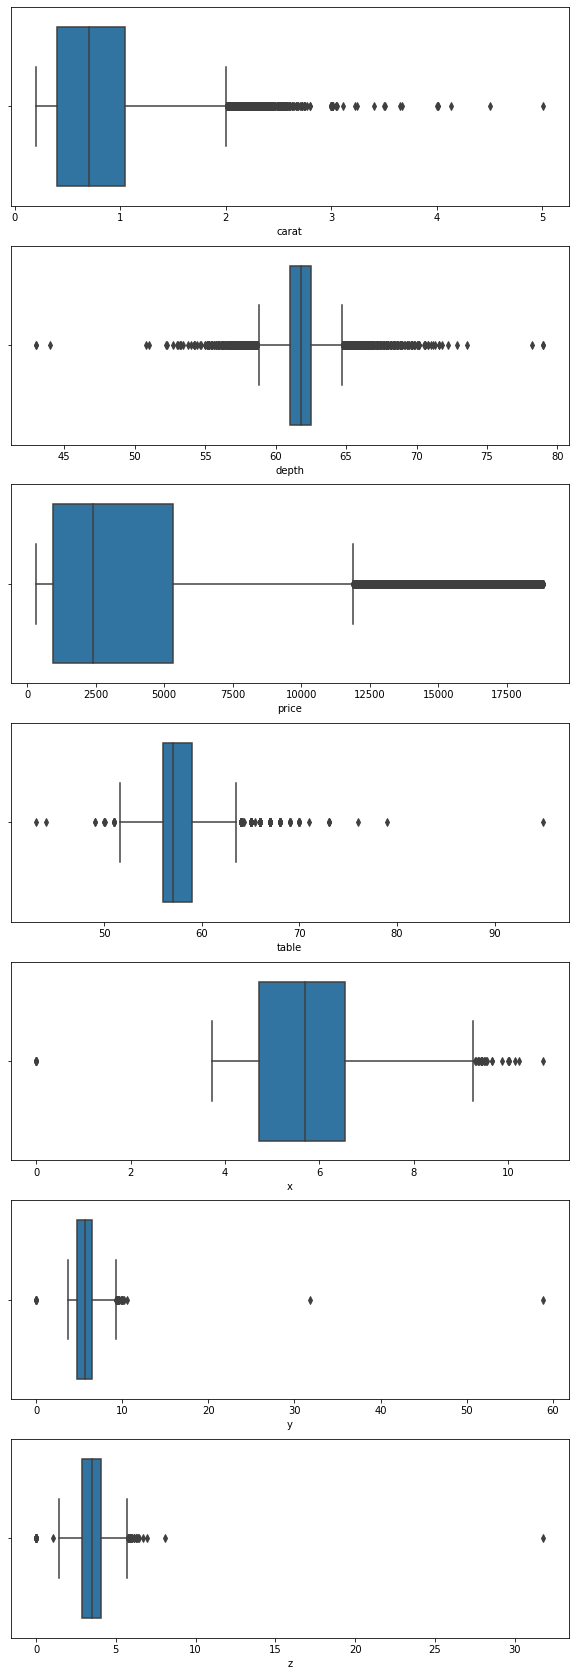

In [ ]:
# Detecting outliers in our data.

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=7, ncols=1, figsize=(10,30))
sns.boxplot(diamonds['carat'], ax=ax1)
sns.boxplot(diamonds['depth'], ax=ax2)
sns.boxplot(diamonds['price'], ax=ax3)
sns.boxplot(diamonds['table'], ax=ax4)
sns.boxplot(diamonds['x'], ax=ax5)
sns.boxplot(diamonds['y'], ax=ax6)
sns.boxplot(diamonds['z'], ax=ax7)

From above box plots we can see that our data set outliers. We need to remove these outliers for developing better model

In [ ]:
# Removing outliers
from scipy import stats

z_thresh=3
constrains = diamonds.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh).all(axis=1)
diamonds.drop(diamonds.index[~constrains], inplace=True)

In [ ]:
diamonds.shape

(51590, 10)

In [ ]:
# Finding numerical and categorical features in the diamonds data
numeric_features = diamonds.select_dtypes(include=[np.number])
numeric_features.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [ ]:
categorical_features = diamonds.select_dtypes(include=[np.object])
categorical_features.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
# Estimate Skewness and Kurtosis
diamonds.skew()

carat    0.884936
depth   -0.278412
table    0.440682
price    1.454847
x        0.314478
y        0.308616
z        0.308908
dtype: float64

In [ ]:
diamonds.kurt()

carat    0.227084
depth    0.782697
table   -0.041617
price    1.574307
x       -0.917658
y       -0.926894
z       -0.926754
dtype: float64

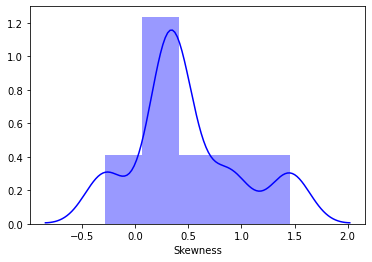

In [ ]:
sns.distplot(diamonds.skew(),color='blue', axlabel='Skewness')

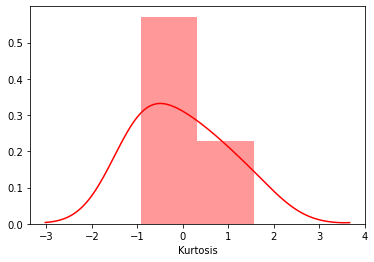

In [ ]:
sns.distplot(diamonds.kurt(),color='r',axlabel ='Kurtosis', kde = True,rug = False)

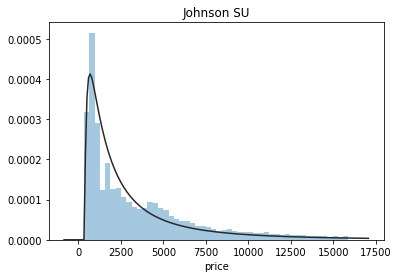

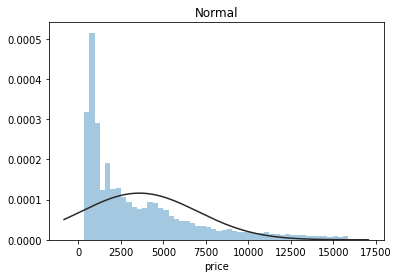

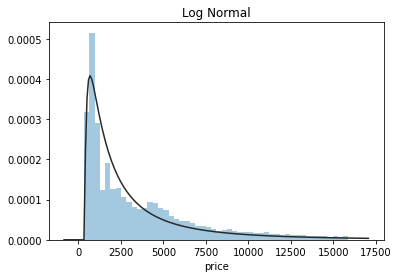

In [ ]:
# Checking if diamonds price is normally distributed or not

import scipy.stats as st

price = diamonds['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(price, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(price, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(price, kde=False, fit=st.lognorm)


*   From above graphs we can see that price distribution is 
    right skewed. So, diamonds price doesn't follow normal  distribution.
*   So, we need to log transform the data before perorming  regression.

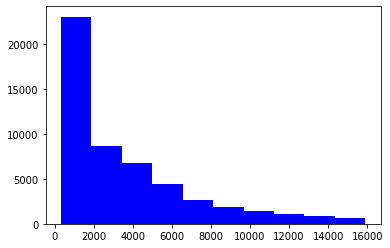

In [ ]:
plt.hist(diamonds['price'], orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([1367., 5918., 8028., 4492., 5827., 5751., 6914., 6092., 4147.,
        3054.]),
 array([5.78689738, 6.1756025 , 6.56430762, 6.95301275, 7.34171787,
        7.73042299, 8.11912811, 8.50783323, 8.89653835, 9.28524347,
        9.67394859]),
 <a list of 10 Patch objects>)

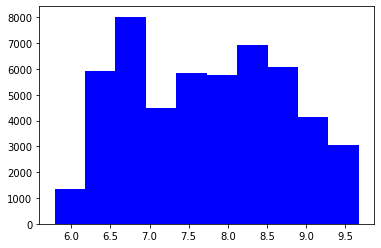

In [ ]:
target = np.log(diamonds['price'])
target.skew()
plt.hist(target,color='blue')

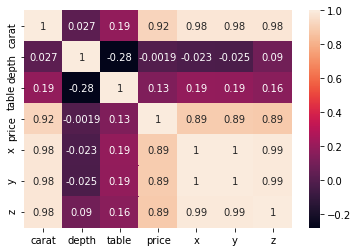

In [ ]:
# Correlation: Finding correlation between nuneric_features and diamonds price
# Correlation heatmap:
sns.heatmap(numeric_features.corr(), annot=True)



*   From above heamap we can see that x,y,z and carat have strong relationship with diamonds price
*   Among them price is related with carat very strongly campred to x,y,z which is almost equal to 0.92(92%)







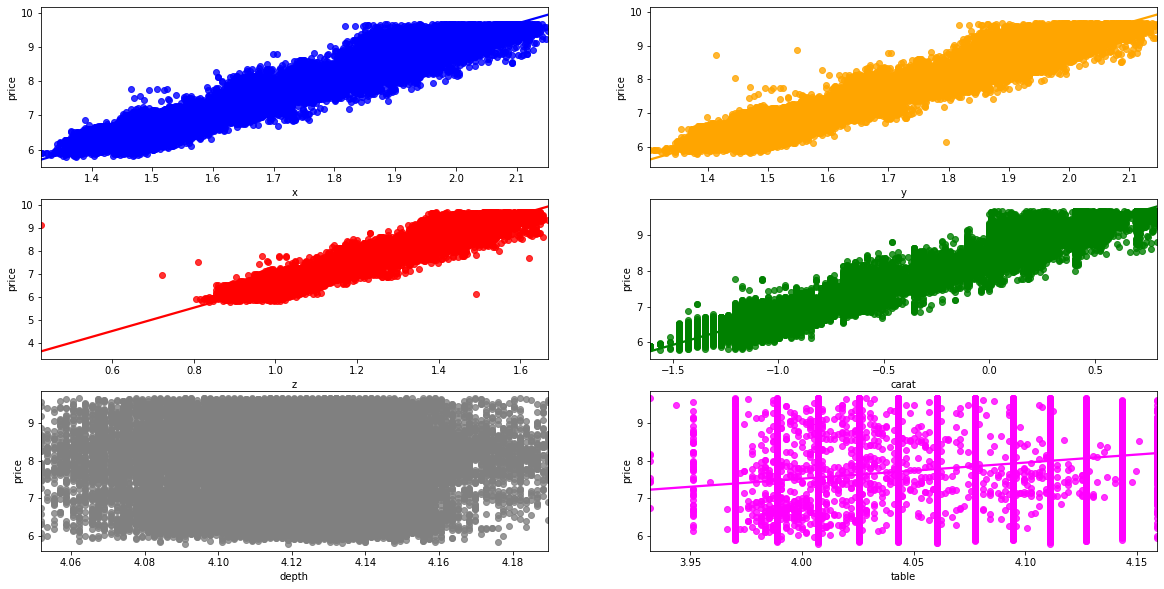

In [ ]:
# We can check this more clearly by using scatter plot
# Before plotting we will convert numerical features into their respective log normal values

fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
x_price_plot_data = diamonds.drop(labels=['carat','cut', 'color','clarity','depth','table','y','z'], axis=1)
sns.regplot(x='x',y='price',data=x_price_plot_data.apply(np.log), scatter=True, fit_reg=True, ax=ax1, color='blue')
y_price_plot_data = diamonds.drop(labels=['carat','cut', 'color','clarity','depth','table','x','z'], axis=1)
sns.regplot(x='y',y='price',data=y_price_plot_data.apply(np.log), scatter=True, fit_reg=True, ax=ax2, color='orange')
z_price_plot_data = diamonds.drop(labels=['carat','cut', 'color','clarity','depth','table','x','y'], axis=1)
sns.regplot(x='z',y='price',data=z_price_plot_data.apply(np.log), scatter=True, fit_reg=True, ax=ax3, color='red')
carat_price_plot_data = diamonds.drop(labels=['cut', 'color','clarity','depth','table','x','y','z'], axis=1)
sns.regplot(x='carat',y='price',data=carat_price_plot_data.apply(np.log), scatter=True, fit_reg=True, ax=ax4, color='green')
depth_price_plot_data = diamonds.drop(labels=['cut', 'color','clarity','carat','table','x','y','z'], axis=1)
sns.regplot(x='depth',y='price',data=depth_price_plot_data.apply(np.log), scatter=True, fit_reg=True, ax=ax5, color='grey')
table_price_plot_data = diamonds.drop(labels=['cut', 'color','clarity','depth','carat','x','y','z'], axis=1)
sns.regplot(x='table',y='price',data=table_price_plot_data.apply(np.log), scatter=True, fit_reg=True, ax=ax6, color='magenta')

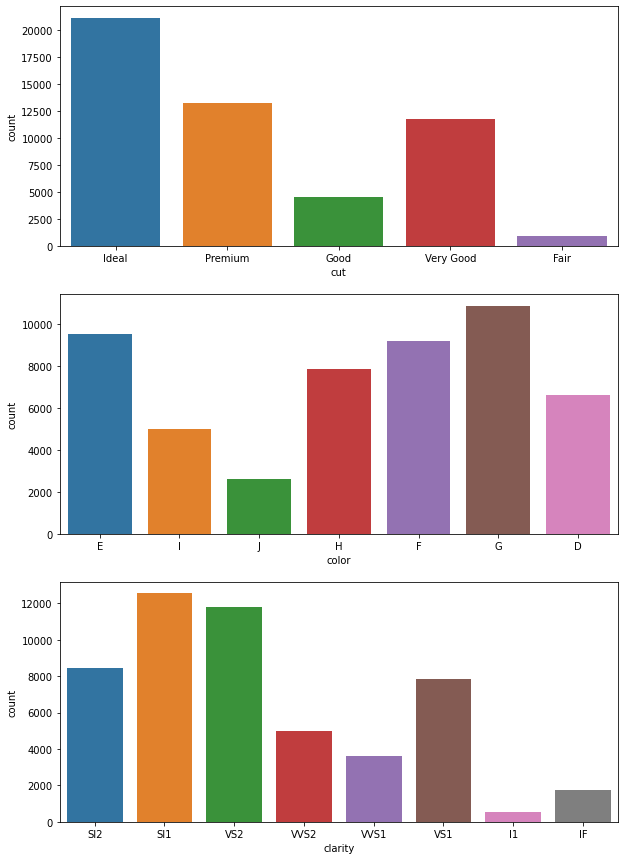

In [ ]:
# Count plots of categorical features
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,15))
sns.countplot(x='cut', data=categorical_features, ax=ax1)
sns.countplot(x='color', data=categorical_features, ax=ax2)
sns.countplot(x='clarity', data=categorical_features, ax=ax3)

Linear Regression



*   From above data analysis results I would like to build a model using linear regression that can be used to predict diamonds price 
*   For this linear regression price is dependant variable and remaining features are independent


*   From above EDA we can see that most of the features of diamonds are linearly realted with price
*   So, I am using linear regression to predict the price of diamonds 





In [ ]:
## Feature Engineering

## Label encoding for categorical variables
le = preprocessing.LabelEncoder()
le.fit(diamonds['clarity'])
diamonds['clarity'] = le.transform(diamonds['clarity'])
le.fit(diamonds['color'])
diamonds['color'] = le.transform(diamonds['color'])
le.fit(diamonds['cut'])
diamonds['cut'] = le.transform(diamonds['cut'])

In [ ]:
X = diamonds[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']].values
y= diamonds['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr_model1 = linear_model.LinearRegression()
lr_model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# validating above model by using cross validation
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('Mean R2 score: ', np.mean(scores))
    print('Standard Deviation: ', np.std(scores))
    print('\n')

In [ ]:
get_cv_scores(lr_model1)

Mean R2 score:  0.8898735340721098
Standard Deviation:  0.0018772180885674858






*   From above model we can see that R2 score is 0.889 which means the model can predict the data upto 89% 
*   We will try to develop a better model than this by transforming numerical features logarithemic values



In [ ]:
diamonds['log_carat'] = np.log(diamonds['carat'])
diamonds['log_price'] = np.log(diamonds['price'])
diamonds['log_x'] = np.log(diamonds['x'])
diamonds['log_y'] = np.log(diamonds['y'])
diamonds['log_z'] = np.log(diamonds['z'])

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat,log_price,log_x,log_y,log_z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897,1.373716,1.381282,0.887891
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897,1.358409,1.345472,0.837248
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141,1.435085,1.442202,0.966984
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131,1.467874,1.470176,1.011601
6,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48,-1.427116,5.817111,1.371181,1.376244,0.908259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,-0.328504,7.921898,1.749200,1.750937,1.252763
53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,-0.328504,7.921898,1.738710,1.749200,1.283708
53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,-0.356675,7.921898,1.733424,1.736951,1.269761
53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,-0.150823,7.921898,1.816452,1.811562,1.319086


In [ ]:
diamonds.to_csv('diamonds_processed.csv')

In [ ]:
######### Linear Regression

# carat	cut	color	clarity	depth	table	price	x	y	z

X = diamonds[['log_carat', 'cut', 'color', 'clarity', 'log_x', 'log_y', 'log_z']].values
y= diamonds['log_price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lr_model2 = linear_model.LinearRegression()
lr_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Now we will validate this model using cross validation function
get_cv_scores(lr_model2)

Mean R2 score:  0.9554465532078609
Standard Deviation:  0.0004558514512297633






*   Now we have got better R2 score.
*   The second model can predict diamond prices upto 95% accurate





In [ ]:
# Checking coefficiencts obtained for each independent variable
regression_coefficients = pd.DataFrame(lr_model.coef_, ['log_carat', 'cut', 'color', 'clarity', 'log_x', 'log_y', 'log_z'], columns=['Coefficient'])  
regression_coefficients

,Coefficient
log_carat,0.502780
cut,-0.002478
color,-0.061854
clarity,0.064886
log_x,1.875165
log_y,1.055244
log_z,0.914378


In [ ]:
# Prediction
y_pred = lr_model2.predict(X_test)

In [ ]:
price_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
price_df

,Actual Price,Predicted Price
0,9.142490,8.956571
1,6.641182,6.724683
2,6.469250,6.554169
3,6.622736,6.569310
4,9.195836,8.880445
...,...,...
10313,6.562444,6.673903
10314,6.829794,6.345194
10315,8.457443,8.752786
10316,8.826588,9.277099


In [ ]:
# Checking the accuracy of the model using Loss functions
# Mean Square Error/Quadratic Loss/L2 Loss

root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(root_mean_square_error)

0.20331076610055088


In [ ]:
# Mean Absolute Error/L1 Loss

mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
print(mean_absolute_error)


0.15498511853059585


In [ ]:
metric_df = pd.DataFrame({'Root Mean Squared Error': root_mean_square_error,
                         'Mean Absolute Error': mean_absolute_error},index=[0])
metric_df

,Root Mean Squared Error,Mean Absolute Error
0,0.203311,0.154985


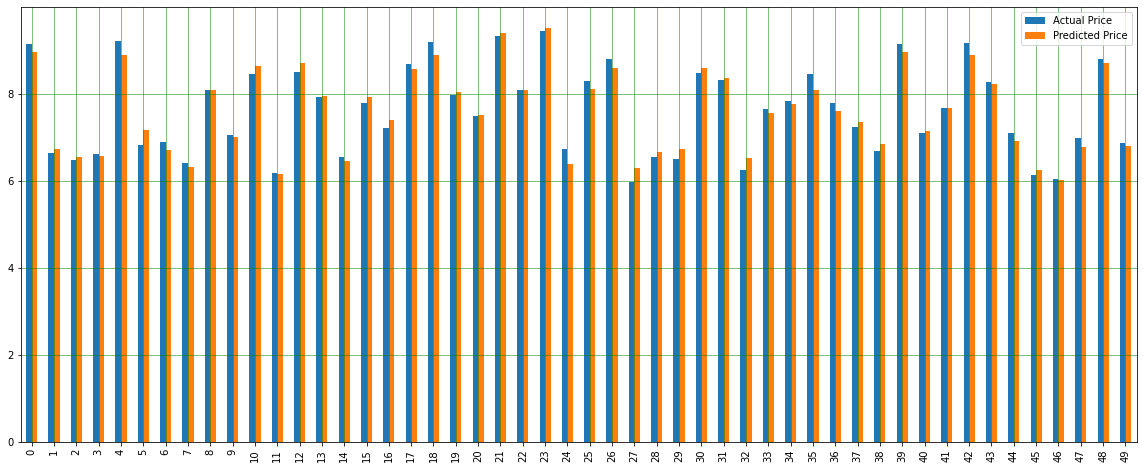

In [ ]:
# Visualizing results of Linear regression
df = price_df.head(50)
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()